In [193]:
import numpy as np
import sklearn
from sklearn.metrics import mean_absolute_error
import pandas as pd
from scipy.linalg import solve_triangular
def multitask(x1,y1,x2,y2,lambda1,lambda2,lambda3,times=100):  ##x1,x2样本量必须相同
    (n,p1)=x1.shape
    (n,p2)=x2.shape
    beta1=np.zeros(p1+1)
    beta2=np.zeros(p2+1)
    cont = np.ones(n)
    x1=np.insert(x1, 0, values=cont, axis=1)
    x2=np.insert(x2, 0, values=cont, axis=1)
    x1x1=np.dot(x1.T,x1)
    x1y1=np.dot(x1.T,y1)
    x1x2=np.dot(x1.T,x2)
    x2x2=np.dot(x2.T,x2)
    x2y2=np.dot(x2.T,y2)
    def beta1hat(beta2):
        M1=(1+lambda1)*x1x1+lambda2*np.identity(p1+1)
        #M1=(x1x1+lambda2*np.identity(p1+1))/(1+lambda2)+lambda1*x1x1
        L1=np.linalg.cholesky(M1)
        b_1 = solve_triangular(L1, x1y1+np.dot(lambda1*x1x2,beta2).reshape((-1,1)), lower=True)
        #print(x1y1.shape)
        #print((np.dot(lambda1*x1x2,beta2)).shape)
        beta1 = solve_triangular(L1.T, b_1, lower=False)
        return beta1
    def beta2hat(beta1):
        M2=(1+lambda1)*x2x2+lambda3*np.identity(p2+1)
        #M2=(x2x2+lambda3*np.identity(p2+1))/(1+lambda3)+lambda1*x2x2
        L2=np.linalg.cholesky(M2)
        b_2 = solve_triangular(L2, x2y2+np.dot(lambda1*x1x2.T,beta1).reshape((-1,1)), lower=True)
        beta2 = solve_triangular(L2.T, b_2, lower=False)
        return beta2
    i=0
    while True:
        i+=1
        b2=beta2
        b1=beta1
        beta1=beta1hat(beta2)
        beta2=beta2hat(beta1)
        if (np.mean((beta1-b1)**2)+np.mean((beta2-b2)**2))<0.001:
           # print(i)
            return {"beta1":beta1,"beta2":beta2}
        if i>=times:
          #  print(i)
            return {"beta1":beta1,"beta2":beta2}

        
        

In [194]:
import numpy as np
import pandas as pd
import scipy.signal

In [195]:
re_col='cool_ext_week'
xiezhu='cool_in_week'
start='2018-3-26'       ##时间
end='2018-4-22'
length=int((pd.DatetimeIndex([end])-pd.DatetimeIndex([start])).values//86400000000000)+1   
data1=pd.read_csv("/home/ruanlx/多任务学习/竞赛阶段2数据处理/"+re_col+".csv")
data2=pd.read_csv("/home/ruanlx/多任务学习/竞赛阶段2数据处理/"+xiezhu+".csv")

In [196]:
data1.index=pd.DatetimeIndex(data1['单据创建时间'])
data1.drop('单据创建时间',axis=1,inplace=True)
data2.index=pd.DatetimeIndex(data2['单据创建时间'])
data2.drop('单据创建时间',axis=1,inplace=True)
data1=data1[list(data1.columns[:63])+list(data1.columns[-6:])]
data2=data2[list(data2.columns[:63])+list(data2.columns[-6:])]
extra_weather=pd.read_csv("/home/ruanlx/天气爬虫/extra_wether.csv")
#extra_weather=extra_weather.iloc[:,1:]
extra_weather.index=pd.DatetimeIndex(extra_weather['单据创建时间'])
extra_weather.drop('单据创建时间',axis=1,inplace=True)
extra_weather=extra_weather[extra_weather.index>'2016-1-1']
extra_weather=extra_weather[extra_weather.index<start]
isholiday=pd.read_csv('/home/ruanlx/多任务学习/竞赛阶段2数据处理/holiday.csv')
isholiday.index=pd.DatetimeIndex(isholiday['date'])
isholiday.drop('date',axis=1,inplace=True)
isholiday=isholiday[isholiday.index>'2016-1-1']
isholiday=isholiday[isholiday.index<start]
fangjiaxiaoying=pd.read_csv('/home/ruanlx/多任务学习/竞赛阶段2数据处理/fangjiaxiaoying.csv',header=None)
fangjiaxiaoying.columns=['date','fangjiaxiaoying']
fangjiaxiaoying.index=pd.DatetimeIndex(fangjiaxiaoying['date'])
fangjiaxiaoying.drop('date',axis=1,inplace=True)
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index>'2016-1-1']
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index<start]

In [197]:
data1=pd.merge(data1,fangjiaxiaoying,left_index=True,right_index=True)
data2=pd.merge(data2,fangjiaxiaoying,left_index=True,right_index=True)

data1=pd.merge(data1,isholiday,left_index=True,right_index=True)
data2=pd.merge(data2,isholiday,left_index=True,right_index=True)

data1=pd.merge(data1,extra_weather,left_index=True,right_index=True)
data2=pd.merge(data2,extra_weather,left_index=True,right_index=True)

In [198]:
data1.iloc[:,:48]=np.log(data1.iloc[:,:48]+0.5)
data2.iloc[:,:48]=np.log(data2.iloc[:,:48]+0.5)
data1.head()

,重量,重量_1,重量_2,重量_3,重量_4,重量_5,重量_6,重量_7,重量_8,重量_9,...,userfeature_10,itemfeature_0,itemfeature_1,year,mon,mday,wday,fangjiaxiaoying,isholiday,极端天气
2016-01-02,7.070438,4.116748,8.059041,7.926652,8.376044,8.009546,6.719328,6.734605,7.983683,7.858563,...,-0.008497,-25.258600,6.164669,2016.0,1.0,2.0,5.0,2.051942,1,0
2016-01-03,7.264008,7.070438,4.116748,8.059041,7.926652,8.376044,8.009546,6.719328,6.734605,7.983683,...,-0.025230,-67.032438,16.360083,2016.0,1.0,3.0,6.0,2.562557,1,0
2016-01-04,8.734657,7.264008,7.070438,4.116748,8.059041,7.926652,8.376044,8.009546,6.719328,6.734605,...,0.955814,-223.441458,54.533610,2016.0,1.0,4.0,0.0,1.903677,0,0
2016-01-05,8.746825,8.734657,7.264008,7.070438,4.116748,8.059041,7.926652,8.376044,8.009546,6.719328,...,0.916629,-255.500450,62.357998,2016.0,1.0,5.0,1.0,1.150945,0,0
2016-01-06,8.123650,8.746825,8.734657,7.264008,7.070438,4.116748,8.059041,7.926652,8.376044,8.009546,...,-0.055911,-201.097313,49.080249,2016.0,1.0,6.0,2.0,0.837109,0,0


In [199]:
lag_sum=7
#data1=data1[list(data1.columns[:55])+list(data1.columns[-7:])]
#data1.index=pd.DatetimeIndex(data1['单据创建时间'])
#data1.drop('单据创建时间',axis=1,inplace=True)
ts1=data1['重量'].copy()
h = np.ones((lag_sum,))
list_col_not_transfer=['year',	'mon',	'mday',	'wday']
for i in data1.columns:
    if i not in list_col_not_transfer:
        ts_sum_7=scipy.signal.convolve(data1[i], h,'valid')
        ts_sum_7=pd.Series(ts_sum_7)
        ts_sum_7.index=ts1.index[lag_sum-1:]
        #print(ts_sum_7)
        data1[i]=ts_sum_7

In [200]:
#data2=data2[list(data2.columns[:55])+list(data2.columns[-7:])]
#data2.index=pd.DatetimeIndex(data2['单据创建时间'])
#data2.drop('单据创建时间',axis=1,inplace=True)
ts2=data2['重量'].copy()
h = np.ones((lag_sum,))
for i in data2.columns:
    if i not in list_col_not_transfer:
        ts_sum_7=scipy.signal.convolve(data2[i], h,'valid')
        ts_sum_7=pd.Series(ts_sum_7)
        ts_sum_7.index=ts2.index[lag_sum-1:]
        data2[i]=ts_sum_7

In [201]:
data1=data1[data1.index>'2016-1-8']
data2=data2[data2.index>'2016-1-8']

In [202]:
#plt.plot(np.array(np.log(data1['重量'])[1:])-np.array(np.log(data1['重量'])[:-1]))

In [203]:
data1.head()

,重量,重量_1,重量_2,重量_3,重量_4,重量_5,重量_6,重量_7,重量_8,重量_9,...,userfeature_10,itemfeature_0,itemfeature_1,year,mon,mday,wday,fangjiaxiaoying,isholiday,极端天气
2016-01-09,55.803397,55.781338,52.027206,52.115367,51.918369,51.547587,50.822477,50.277797,49.941963,53.808898,...,2.686784,-1178.410822,287.605517,2016.0,1.0,9.0,5.0,8.110872,1.0,0.0
2016-01-10,55.506742,55.803397,55.781338,52.027206,52.115367,51.918369,51.547587,50.822477,50.277797,49.941963,...,2.700472,-1165.781523,284.523183,2016.0,1.0,10.0,6.0,5.937809,0.0,0.0
2016-01-11,54.938873,55.506742,55.803397,55.781338,52.027206,52.115367,51.918369,51.547587,50.822477,50.277797,...,2.711329,-1143.437377,279.069822,2016.0,1.0,11.0,0.0,4.370243,0.0,0.0
2016-01-12,54.439289,54.938873,55.506742,55.803397,55.781338,52.027206,52.115367,51.918369,51.547587,50.822477,...,1.761089,-1066.690093,260.338712,2016.0,1.0,12.0,1.0,3.521318,0.0,0.0
2016-01-13,54.937379,54.439289,54.938873,55.506742,55.803397,55.781338,52.027206,52.115367,51.918369,51.547587,...,3.743428,-1037.545555,253.225633,2016.0,1.0,13.0,2.0,2.958451,0.0,0.0


In [204]:
y1=data1['重量']
x1=data1.drop('重量',axis=1)
train_x1=np.array(x1.iloc[:-7,:])
train_y1=np.array(y1[:-7])
test_x1=np.array(x1.iloc[-7:,:])
test_y1=np.array(y1[-7:])

In [205]:
y2=data2['重量']
x2=data2.drop('重量',axis=1)
train_x2=np.array(x2.iloc[:-7,:])
train_y2=np.array(y2[:-7])
test_x2=np.array(x2.iloc[-7:,:])
test_y2=np.array(y2[-7:])

In [206]:
from sklearn import preprocessing
scaler_x1 = preprocessing.StandardScaler().fit(train_x1)
train_x1=scaler_x1.transform(train_x1)       
scaler_x2 = preprocessing.StandardScaler().fit(train_x2)
train_x2=scaler_x2.transform(train_x2)  

scaler_y1 = preprocessing.StandardScaler().fit(train_y1.reshape((-1,1)))
train_y1=scaler_y1.transform(train_y1.reshape((-1,1)))       
scaler_y2 = preprocessing.StandardScaler().fit(train_y2.reshape((-1,1)))
train_y2=scaler_y2.transform(train_y2.reshape((-1,1)))  


In [207]:
test_x1=scaler_x1.transform(test_x1)   
test_x2=scaler_x2.transform(test_x2)
test_y1=scaler_y1.transform(test_y1.reshape((-1,1)))   
test_y2=scaler_y2.transform(test_y2.reshape((-1,1)))

In [208]:
def predict(test_x1,beta1,test_y1=[np.nan]):
    y_pred=np.dot(np.insert(test_x1, 0, values=1, axis=1),beta1)
    if sum(np.isnan(test_y1)):
        return {'yhat':y_pred}
    else:
        return {"yhat":y_pred,"mae":sklearn.metrics.mean_absolute_error(test_y1,y_pred)}

In [209]:
b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=0,lambda2=85.44,lambda3=0.1,times=1000)
#np.exp(scaler_y1.inverse_transform(predict(test_x1,b['beta1'],test_y1)['yhat']))-0.5
predict(test_x1,b['beta1'],test_y1)['mae']

0.12259296382593933

In [210]:
'''
import itertools
lambda1=np.linspace(0,1,num=10)
#lambda2=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))
#lambda3=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))
lambda2=np.linspace(0.01,500,num=10)
lambda3=np.linspace(1,700,num=10)

mae=[]
for i in itertools.product(lambda1,lambda2,lambda3):
    b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=i[0],lambda2=i[1],lambda3=i[2],times=1000)
    #print([i[0],i[1],i[2],predict(test_x1,test_y1,b['beta1'])['mae']])
    mae.append([i[0],i[1],i[2],predict(test_x1,b['beta1'],test_y1)['mae']])

mae=pd.DataFrame(mae)
mae.columns=['lambda1','lambda2','lambda3','mae']



lambda_=mae[mae['mae']==np.min(mae['mae'])].iloc[0,:]
print(lambda_)
b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=lambda_[0],lambda2=lambda_[1],lambda3=lambda_[2],times=1000)
yhat=predict(test_x1,b['beta1'],test_y1)
print(yhat['mae'])
#scaler_y1.inverse_transform(yhat['yhat'])
'''

"\nimport itertools\nlambda1=np.linspace(0,1,num=10)\n#lambda2=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))\n#lambda3=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))\nlambda2=np.linspace(0.01,500,num=10)\nlambda3=np.linspace(1,700,num=10)\n\nmae=[]\nfor i in itertools.product(lambda1,lambda2,lambda3):\n    b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=i[0],lambda2=i[1],lambda3=i[2],times=1000)\n    #print([i[0],i[1],i[2],predict(test_x1,test_y1,b['beta1'])['mae']])\n    mae.append([i[0],i[1],i[2],predict(test_x1,b['beta1'],test_y1)['mae']])\n\nmae=pd.DataFrame(mae)\nmae.columns=['lambda1','lambda2','lambda3','mae']\n\n\n\nlambda_=mae[mae['mae']==np.min(mae['mae'])].iloc[0,:]\nprint(lambda_)\nb=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=lambda_[0],lambda2=lambda_[1],lambda3=lambda_[2],times=1000)\nyhat=predict(test_x1,b['beta1'],test_y1)\nprint(yhat['mae'])\n#scaler_y1.inverse_transform(yhat['yhat'])\n"

In [211]:
lambda_=[0.556,500,467]
b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=lambda_[0],lambda2=lambda_[1],lambda3=lambda_[2],times=1000)
yhat=predict(test_x1,b['beta1'],test_y1)
print(yhat['mae'])

0.011471330717817299


In [212]:
import time, datetime
def ymd(d):
    a=np.zeros(d.shape[0])
    b=np.zeros(d.shape[0])
    c=np.zeros(d.shape[0])
    e=np.zeros(d.shape[0])
    for i in range(d.shape[0]):
        timeArray = time.strptime(str(d.index[i])[:10], "%Y-%m-%d")
        a[i]=timeArray.tm_year
        b[i]=timeArray.tm_mon
        c[i]=timeArray.tm_mday
        e[i]=timeArray.tm_wday
    d['year']=(a-scaler_x1.mean_[-7])/(np.sqrt(scaler_x1.var_)[-7])
    d['mon']=(b-scaler_x1.mean_[-6])/(np.sqrt(scaler_x1.var_)[-6])
    d['mday']=(c-scaler_x1.mean_[-5])/(np.sqrt(scaler_x1.var_)[-5])
    d['wday']=(e-scaler_x1.mean_[-4])/(np.sqrt(scaler_x1.var_)[-4])
fangjiaxiaoying=pd.read_csv('/home/ruanlx/多任务学习/竞赛阶段2数据处理/fangjiaxiaoying.csv',header=None)
fangjiaxiaoying.columns=['date','fangjiaxiaoying']
fangjiaxiaoying.index=pd.DatetimeIndex(fangjiaxiaoying['date'])
fangjiaxiaoying.drop('date',axis=1,inplace=True)
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index>=start]
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index<=end]
fangjiaxiaoying=(fangjiaxiaoying-scaler_x1.mean_[-3])/(np.sqrt(scaler_x1.var_)[-3])

isholiday=pd.read_csv('/home/ruanlx/多任务学习/竞赛阶段2数据处理/holiday.csv')
isholiday.index=pd.DatetimeIndex(isholiday['date'])
isholiday.drop('date',axis=1,inplace=True)
isholiday=isholiday[isholiday.index>=start]
isholiday=isholiday[isholiday.index<=end]
isholiday=(isholiday-scaler_x1.mean_[-2])/(np.sqrt(scaler_x1.var_)[-2])
#isholiday

extra_weather=pd.read_csv("/home/ruanlx/天气爬虫/extra_wether.csv")
#extra_weather=extra_weather.iloc[:,1:]
extra_weather.index=pd.DatetimeIndex(extra_weather['单据创建时间'])
extra_weather.drop('单据创建时间',axis=1,inplace=True)
extra_weather=extra_weather[extra_weather.index>=start]
extra_weather=extra_weather[extra_weather.index<=end]
extra_weather=(extra_weather-scaler_x1.mean_[-1])/(np.sqrt(scaler_x1.var_)[-1])



In [213]:
train_index=x1.index
train_columns=x1.columns
x1=pd.DataFrame(scaler_x1.transform(x1))
x1.index=train_index
x1.columns=train_columns
y1=pd.DataFrame(scaler_y1.transform(np.array(y1).reshape((-1,1))))
y1=y1[0]
y1.index=train_index

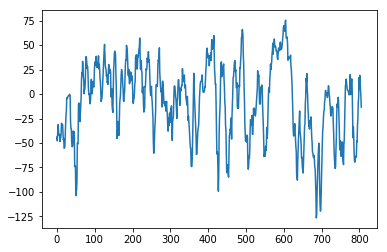

In [214]:
import matplotlib.pyplot as plt
plt.plot(np.array(data1.userfeature_1[1:]))

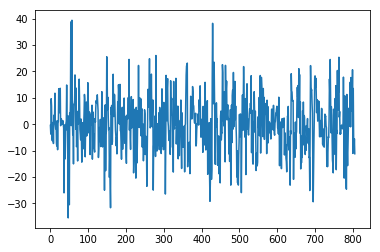

In [215]:
plt.plot(np.array(data1.userfeature_1[1:])-np.array(data1.userfeature_1[:-1]))

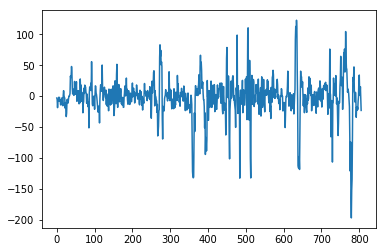

In [216]:
plt.plot(np.array(data1.itemfeature_1[1:])-np.array(data1.itemfeature_1[:-1]))

In [217]:

from statsmodels.tsa.arima_model import ARIMA
import datetime 
def ts_predict(b,time_series,train,start,end):
    index=pd.DatetimeIndex(start=start, end=end, freq='D')
    start=pd.DatetimeIndex([start])
    end=pd.DatetimeIndex([end])
    timelength=int(((end-start).values)/86400000000000)+1
    test=np.zeros((timelength,len(train.columns)))
    test=pd.DataFrame(test,index=index,columns=train.columns)
    ymd(test)
    test['isholiday']=isholiday
    test['极端天气']=extra_weather
    for i in train.columns:
        if i.split('_')[0]=="userfeature":
        
            try:
                model_user = ARIMA(train[i],order=(7,1,0))
                arima_result = model_user.fit()
                test.loc[:,i] = arima_result.predict(start=(str(start.values[0]).split('T')[0]),
                                                 end=(str(end.values[0]).split('T')[0]),
                                                 dynamic=True) 
            except np.linalg.LinAlgError:
                print("MMP")
            except ValueError:
                print("cao")
            #print((str(start.values[0]).split('T')[0]))
            print(i)
            
        if i.split('_')[0]=="itemfeature":
            model_user = ARIMA(train[i],order=(7,1,0))
            arima_result = model_user.fit()
            test.loc[:,i] = arima_result.predict(start=(str(start.values[0]).split('T')[0]),
                                                 end=(str(end.values[0]).split('T')[0]),
                                                 dynamic=True) 
        
            
            
    for i in index:      
        if(bool(pd.isna(time_series[pd.DatetimeIndex([i-datetime.timedelta(days =1)])].values))):
           # print(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1']))
           time_series[i-datetime.timedelta(days =1)]=float(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1'])['yhat'])
            
                
        for j in train.columns:
            if j.split('_')[0]=="重量":
                test.loc[i,j]=time_series[i-datetime.timedelta(days =int(j.split('_')[1]))]               
    #print(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1'])['yhat'])
    time_series[i]=float(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1'])['yhat'])

    return time_series[-length:]
a=ts_predict(b,y1,x1,start,end)
a

/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_0


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_1
MMP
userfeature_2


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_3


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_4


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_5


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_6
MMP
userfeature_7


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_8


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_9


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


userfeature_10


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2018-03-26    0.625291
2018-03-27    0.563242
2018-03-28    0.494135
2018-03-29    0.436927
2018-03-30    0.397685
2018-03-31    0.351792
2018-04-01    0.331427
2018-04-02    0.325436
2018-04-03    0.324607
2018-04-04    0.330649
2018-04-05    0.296854
2018-04-06    0.286830
2018-04-07    0.281161
2018-04-08    0.313862
2018-04-09    0.310395
2018-04-10    0.312355
2018-04-11    0.314464
2018-04-12    0.319876
2018-04-13    0.326555
2018-04-14    0.330484
2018-04-15    0.334875
2018-04-16    0.335986
2018-04-17    0.337037
2018-04-18    0.332960
2018-04-19    0.327379
2018-04-20    0.320071
2018-04-21    0.312827
2018-04-22    0.312827
Name: 0, dtype: float64

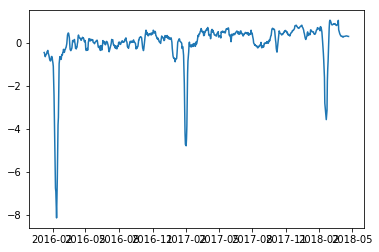

In [218]:
plt.plot(y1)

In [219]:
start=pd.DatetimeIndex([start])
end=pd.DatetimeIndex([end])

In [220]:
re=pd.Series(np.zeros(length))
re.index=a.index

In [221]:
ts1=((ts1)-scaler_y1.mean_/7)/np.sqrt(scaler_y1.var_)

In [222]:
for j in range(length):
    q=0
    for i in range(1,lag_sum):
        #print(ts1[start+datetime.timedelta(days =j)-datetime.timedelta(days =i)])
        q+=ts1[start+datetime.timedelta(days =j)-datetime.timedelta(days =i)].values
        #print(ts1[start-datetime.timedelta(days =i)])
    re[start+datetime.timedelta(days =j)]=a[start+datetime.timedelta(days =j)]-q
    ts1=ts1.append(re[start+datetime.timedelta(days =j)])

In [223]:

re=(np.exp((re*np.sqrt(scaler_y1.var_))+scaler_y1.mean_/7)-0.5)

In [224]:
re=pd.DataFrame(re)
re.columns=[re_col]
re.to_csv('result_'+re_col+'.csv')

In [225]:
re

,cool_ext_week
2018-03-26,544.354479
2018-03-27,6966.713450
2018-03-28,10480.451469
2018-03-29,9310.177796
2018-03-30,13558.744307
2018-03-31,7896.473325
2018-04-01,9640.523036
2018-04-02,521.863665
2018-04-03,6926.193153
2018-04-04,10935.639830
